In [1]:
from tensorflow.contrib.keras import applications as app
from tensorflow.contrib.keras import preprocessing as pp
from tensorflow.keras.models import load_model
import numpy as np
import operator
from matplotlib.pyplot import imshow
from PIL import Image
from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import CustomObjectScope
from tensorflow.keras.initializers import glorot_uniform

In [14]:
model = load_model('modelex.h5')

In [17]:
img_path = '/home/ubuntu/test1.jpeg'
img = pp.image.load_img(path=img_path, target_size=(120, 120))
processed_img = pp.image.img_to_array(img)
processed_img = np.expand_dims(processed_img, axis=0)
processed_img = app.xception.preprocess_input(processed_img)

preds = model.predict(processed_img)
preds = np.ravel(preds)
index, value = max(enumerate(preds), key=operator.itemgetter(1))
print(index)
print(preds)

1
[3.25298011e-02 6.98260605e-01 1.33503685e-02 1.59783065e-02
 2.76309531e-02 4.23307382e-02 2.69195228e-03 2.80186106e-02
 9.32074636e-02 4.83523402e-03 1.34945726e-02 5.07275225e-04
 3.72949755e-03 6.95700850e-03 1.58712007e-02 6.06457063e-04]


In [18]:
vowel = ["A","E","I","O","U"]
species_decode = ["American Crow",
                  "American Goldfinch", 
                  "American Robin", 
                  "Black and White Warbler", 
                  "Blue Jay", 
                  "Cedar Waxwing", 
                  "Chickadee", 
                  "Common Starling", 
                  "Downy Woodpecker", 
                  "House Finch", 
                  "Mourning Dove", 
                  "Northern Cardinal", 
                  "Prarie Warbler", 
                  "Redheaded Woodpecker",  
                  "Ruby-Throated Hummingbird",
                  "Sparrow",
                  "Tufted Titmouse"]


species = species_decode[index] 
if species[0] in vowel: # Who likes proper grammar?
    species = "A little birdy told me this is an " + species + "."
else: 
    species = "A little birdy told me this is a " + species + "."

A little birdy told me this is an American Goldfinch.


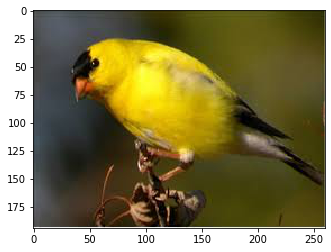

In [19]:
%matplotlib inline
pil_im = Image.open(img_path, 'r')
imshow(np.asarray(pil_im))
print(species)